In [ ]:
from google.colab import drive
drive.mount( '/content/gdrive' )


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install pyspark==3.0.1 py4j==0.10.9


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName('train').getOrCreate()


In [ ]:
#data  =  spark.read.csv('/content/gdrive/MyDrive/VN_housing_dataset.csv', sep= ',',header=True ,inferSchema = True)


In [ ]:
#data.head(3)

In [ ]:
#data.printSchema()

In [ ]:
data.show()


NameError: ignored

In [ ]:
import tensorflow as tf
!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
print("TensorFlow v" + tf.__version__)
print("TensorFlow Decision Forests v" + tfdf.__version__)

TensorFlow v2.14.0
TensorFlow Decision Forests v1.6.0


In [ ]:
train_file_path = "/content/gdrive/MyDrive/GiaChungCu_HCM_June2021_laydulieu_com.csv"
dataset_df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1950, 11)


In [ ]:

dataset_df = dataset_df.rename(columns={'GIỐNG - LOẠI': 'LOAI'})
dataset_df = dataset_df.rename(columns={'GIỐNG - NHU CẦU': 'NHU_CAU'})
dataset_df = dataset_df.rename(columns={'GIỐNG - TỈNH THÀNH': 'TINH_THANH'})
dataset_df= dataset_df.rename(columns={'GIÁ - TRIỆU ĐỒNG': 'GIA_TRIEU_DONG'})
dataset_df= dataset_df.rename(columns={'DIỆN TÍCH - M2': 'DIEN_TICH_M2'})

dataset_df =dataset_df.rename(columns={'QUẬN HUYỆN': 'QUAN_HUYEN'})
dataset_df =dataset_df.rename(columns={'SỐ TẦNG': 'SO_TANG'})
dataset_df= dataset_df.rename(columns={'SỐ PHÒNG': 'SO_PHNG'})
dataset_df =dataset_df.rename(columns={'SỐ TOILETS': 'SO_TOILETS'})
dataset_df= dataset_df.rename(columns={'GIẤY TỜ PHÁP LÝ': 'GIAY_TO_PHAP_LY'})

In [ ]:
dataset_df.head()

,LOAI,NHU_CAU,TINH_THANH,QUAN_HUYEN,GIA_TRIEU_DONG,DIEN_TICH_M2,HƯỚNG,SO_TANG,SO_PHNG,SO_TOILETS,GIAY_TO_PHAP_LY
0,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,2650.0,69.0,NaN,NaN,2.0,2.0,Đã có sổ
1,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Bình,3970.0,74.1,NaN,NaN,2.0,2.0,Đang chờ sổ
2,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,678.0,46.5,Tây,NaN,1.0,1.0,Đang chờ sổ
3,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Phú,2870.0,65.0,NaN,NaN,2.0,2.0,NaN
4,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,3000.0,70.0,Đông Bắc,NaN,2.0,2.0,Đã có sổ


count      1950.000000
mean       3261.196558
std        5280.514953
min         100.000000
25%        1790.000000
50%        2400.000000
75%        3450.000000
max      150000.000000
Name: GIA_TRIEU_DONG, dtype: float64


<ipython-input-78-f063b0d9ea25>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_df['GIA_TRIEU_DONG'], color='g', bins=100, hist_kws={'alpha': 0.4});


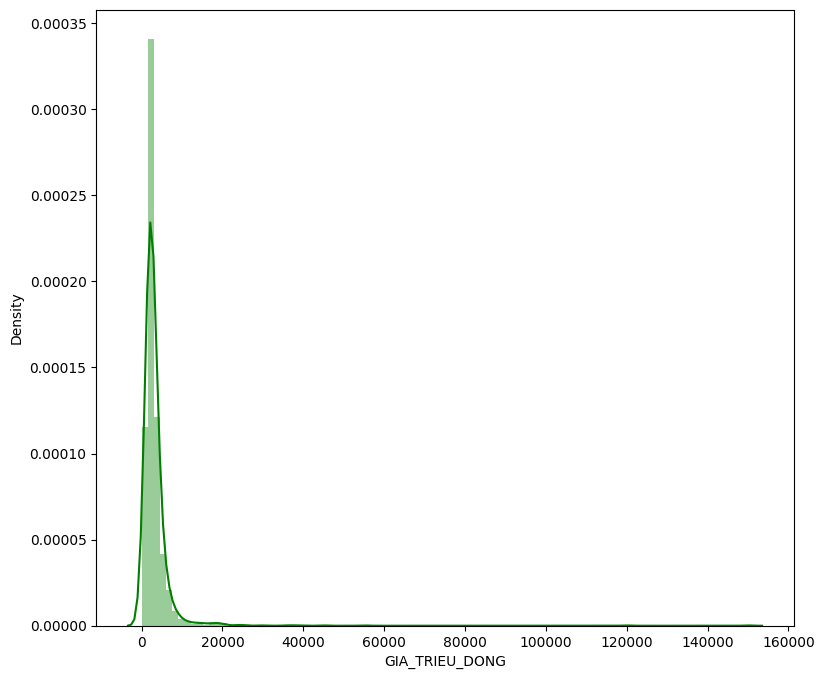

In [ ]:
print(dataset_df['GIA_TRIEU_DONG'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataset_df['GIA_TRIEU_DONG'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
list(set(dataset_df.dtypes.tolist()))

[dtype('O'), dtype('float64')]

In [ ]:
df_num = dataset_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,GIA_TRIEU_DONG,DIEN_TICH_M2,SO_TANG,SO_PHNG,SO_TOILETS
0,2650.0,69.0,NaN,2.0,2.0
1,3970.0,74.1,NaN,2.0,2.0
2,678.0,46.5,NaN,1.0,1.0
3,2870.0,65.0,NaN,2.0,2.0
4,3000.0,70.0,NaN,2.0,2.0


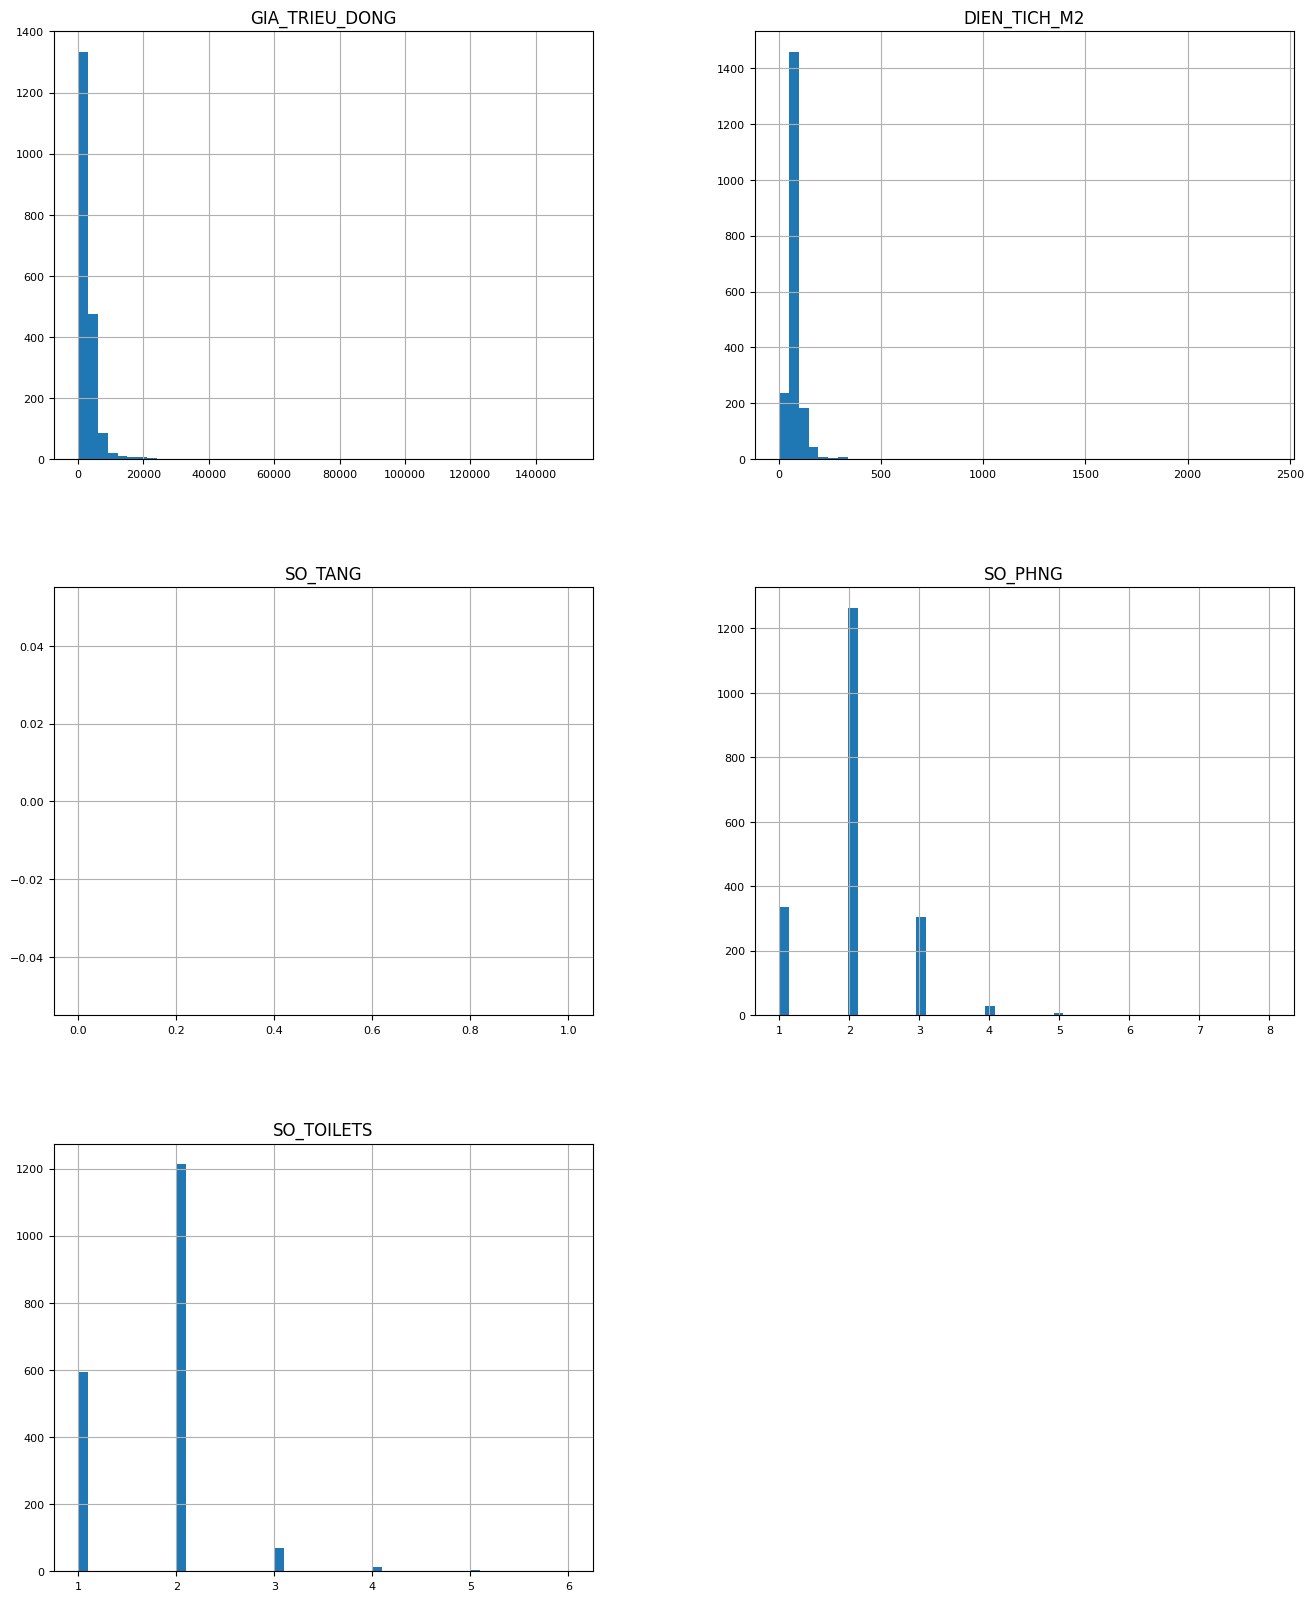

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
import numpy as np

def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_df)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

1358 examples in training, 592 examples in testing.


In [ ]:
train_ds_pd.head()

,LOAI,NHU_CAU,TINH_THANH,QUAN_HUYEN,GIA_TRIEU_DONG,DIEN_TICH_M2,HƯỚNG,SO_TANG,SO_PHNG,SO_TOILETS,GIAY_TO_PHAP_LY
0,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,2650.0,69.0,NaN,NaN,2.0,2.0,Đã có sổ
1,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Bình,3970.0,74.1,NaN,NaN,2.0,2.0,Đang chờ sổ
2,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,678.0,46.5,Tây,NaN,1.0,1.0,Đang chờ sổ
5,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 7,3200.0,70.0,NaN,NaN,2.0,NaN,Đang chờ sổ
8,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Thủ Đức,3500.0,89.0,NaN,NaN,2.0,2.0,NaN


In [ ]:
label = 'GIA_TRIEU_DONG'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label='GIA_TRIEU_DONG', task = tfdf.keras.Task.REGRESSION, fix_feature_names=False)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label='GIA_TRIEU_DONG', task = tfdf.keras.Task.REGRESSION, fix_feature_names=False)

In [ ]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [ ]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"]) # Optional, you can use this to include a list of eval metrics

Use /tmp/tmpe_n6900v as temporary training directory


In [ ]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.341071. Found 1358 examples.
Training model...
Model trained in 0:00:01.268497
Compiling model...


Model compiled.


In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=8)

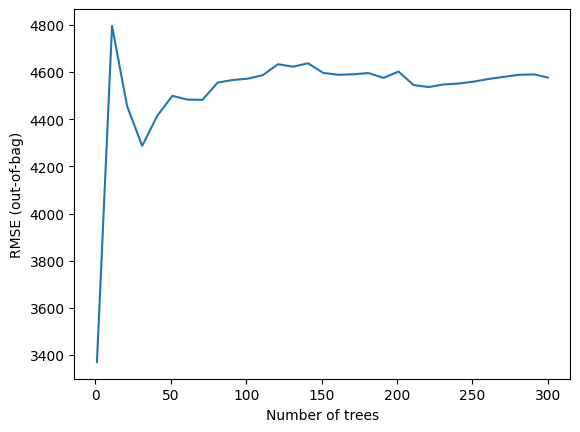

In [ ]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [ ]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1358, accuracy=None, loss=None, rmse=4576.753607658075, ndcg=None, aucs=None, auuc=None, qini=None)

In [ ]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 203ms/step - loss: 0.0000e+00 - mse: 6726828.0000
loss: 0.0000
mse: 6726828.0000


In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 SUM_SCORE
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT


In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("DIEN_TICH_M2" (1; #0), 202.0),
 ("SO_PHNG" (1; #6), 75.0),
 ("QUAN_HUYEN" (4; #5), 21.0),
 ("SO_TOILETS" (1; #8), 2.0)]

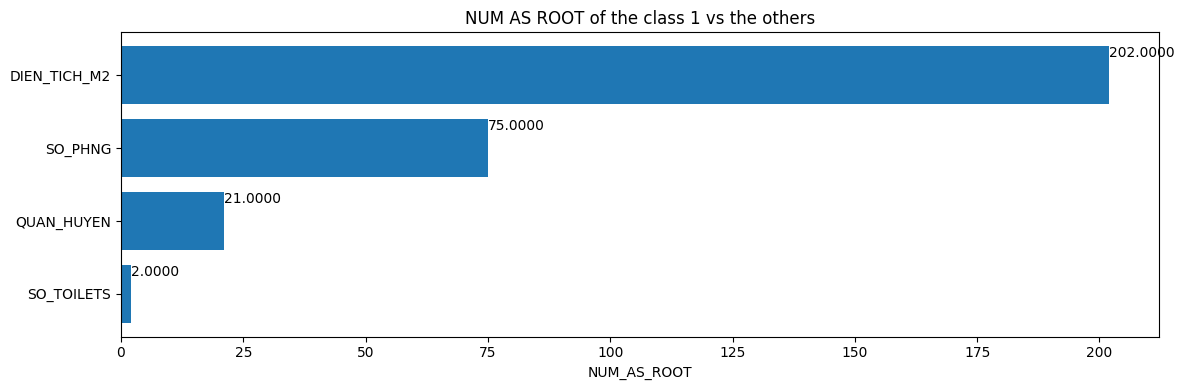

In [ ]:
plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]
# The feature are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()

In [ ]:



test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(
    dataset_df,
    task = tfdf.keras.Task.REGRESSION)



In [ ]:
test_ds

<_PrefetchDataset element_spec={'LOAI': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'NHU_CAU': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'TINH_THANH': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'QUAN_HUYEN': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'GIA_TRIEU_DONG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'DIEN_TICH_M2': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'HƯỚNG': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'SO_TANG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'SO_PHNG': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'SO_TOILETS': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'GIAY_TO_PHAP_LY': TensorSpec(shape=(None,), dtype=tf.string, name=None)}>

In [ ]:
preds = rf.predict(test_ds)

2/2 [==============================] - 0s 48ms/step


In [1]:
sample_submission_df = pd.read_csv('/content/gdrive/MyDrive/GiaChungCu_HCM_June2021_laydulieu_com.csv')
sample_submission_df['Giá dự đoán'] = rf.predict(test_ds)


NameError: ignored

In [ ]:
sample_submission_df.head()